In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Problem 1
df = pd.read_csv("./data/Orders.csv")

In [3]:
df.shape

(51290, 24)

In [4]:
df.sample(5)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
8898,5323,US-2014-RD1990082-41787,5/28/14,5/28/14,Same Day,RD-1990082,Ruben Dartt,Consumer,NaN,Lagos de Moreno,...,FUR-CH-5756,Furniture,Chairs,"SAFCO Chairmat, Adjustable",$199.39,6,0.2,-$37.49,37.711,Medium
50427,2715,US-2012-PO1919518-41185,10/3/12,10/8/12,Standard Class,PO-1919518,Phillina Ober,Home Office,NaN,Blumenau,...,OFF-LA-6043,Office Supplies,Labels,"Smead Legal Exhibit Labels, Adjustable",$2.40,1,0.6,-$2.04,1.152,Medium
9194,39354,CA-2013-CB12025140-41514,8/28/13,9/4/13,Standard Class,CB-120251404,Cassandra Brandow,Consumer,90049.0,Los Angeles,...,OFF-BI-4378,Office Supplies,Binders,GBC Wire Binding Combs,$41.36,5,0.2,$13.96,3.440,Medium
37109,7210,MX-2013-JM15535143-41464,7/9/13,7/13/13,Second Class,JM-15535143,Jessica Myrick,Consumer,NaN,Guarenas,...,FUR-CH-5367,Furniture,Chairs,"Novimex Bag Chairs, Black",$34.82,2,0.4,$2.30,2.978,Medium
505,21884,IN-2013-KN163907-41611,12/3/13,12/10/13,Standard Class,KN-163907,Katherine Nockton,Corporate,NaN,Kwinana,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$4,099.68",10,0.1,$956.58,288.980,Medium


In [5]:
df[["Profit", "Sales"]].describe()



,Profit,Sales
count,51290,51290
unique,16579,20049
top,$0.00,$12.96
freq,668,67


In [6]:
df[["Profit", "Sales"]].sample(5)

,Profit,Sales
7587,$63.45,$228.42
37388,$6.55,$21.12
39019,$3.44,$14.48
7917,$91.89,$256.17
14049,$39.09,$440.64


In [7]:
df[["Profit", "Sales"]].applymap(lambda x: x.replace('$', "")).applymap(lambda x: x.replace(',', "")).astype("float64")

,Profit,Sales
0,62.15,221.98
1,-288.77,3709.40
2,919.97,5175.17
3,-96.54,2892.51
4,311.52,2832.96
...,...,...
51285,4.50,65.10
51286,3.34,16.72
51287,2.48,8.56
51288,2.40,13.44


In [8]:
df[["Profit", "Sales"]] = df[["Profit", "Sales"]].applymap(lambda x: x.replace('$', "")).applymap(lambda x: x.replace(',', "")).astype("float64")



In [9]:
df[["Profit", "Sales"]].describe()

,Profit,Sales
count,51290.000000,51290.000000
mean,28.610970,246.490685
std,174.341066,487.565388
min,-6599.980000,0.440000
25%,0.000000,30.762500
50%,9.240000,85.055000
75%,36.810000,251.055000
max,8399.980000,22638.480000


In [10]:
# Start of Problem 2
df.columns


Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [11]:
df.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [13]:
df[["Ship.Date", "Order.Date"]].sample(5)

,Ship.Date,Order.Date
45831,3/7/14,3/5/14
1944,6/4/15,6/3/15
34436,3/5/12,3/2/12
33959,6/21/13,6/15/13
14157,5/28/13,5/23/13


In [12]:
df[["Ship.Date", "Order.Date"]].sample(5).apply(pd.to_datetime, errors="coerce").dtypes


Ship.Date     datetime64[ns]
Order.Date    datetime64[ns]
dtype: object

In [15]:
df[["Ship.Date", "Order.Date"]] = df[["Ship.Date", "Order.Date"]].apply(pd.to_datetime, errors="coerce")



In [14]:
df.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [16]:
df[["Ship.Date", "Order.Date"]].describe()



,Ship.Date,Order.Date
count,51290,51290
unique,1464,1430
top,2015-11-22 00:00:00,2015-06-18 00:00:00
freq,130,135
first,2012-01-03 00:00:00,2012-01-01 00:00:00
last,2016-01-07 00:00:00,2015-12-31 00:00:00


In [17]:
df["order_month"] = df["Order.Date"].dt.month
df["order_year"] = df["Order.Date"].dt.year

In [18]:
df.groupby(["order_month"])["Quantity"].sum()

order_month
1      8872
2      7429
3     10390
4     10466
5     13196
6     18009
7     11046
8     17596
9     20479
10    16303
11    22379
12    22147
Name: Quantity, dtype: int64

In [19]:
# appears that there are higher totals in June, September, November and December
df.groupby(["order_year", "order_month"])["Quantity"].sum()

order_year  order_month
2012        1              1463
            2              1401
            3              1745
            4              1934
            5              2167
            6              3002
            7              1836
            8              3020
            9              3644
            10             2981
            11             3924
            12             4326
2013        1              1874
            2              1444
            3              2237
            4              2250
            5              2921
            6              3671
            7              2321
            8              3818
            9              4205
            10             3563
            11             5193
            12             4614
2014        1              2413
            2              2102
            3              2686
            4              2688
            5              3808
            6              5327
            7   

In [20]:
totals_df = df.groupby(["order_year", "order_month", "Category"])["Quantity"].sum()
totals_df.groupby(["Category", "order_month"])["Quantity"].mean()

KeyError: 'Column not found: Quantity'

In [43]:
totals_df

order_year  order_month  Category       
2012        1            Furniture           246
                         Office Supplies     997
                         Technology          220
            2            Furniture           278
                         Office Supplies     800
                                            ... 
2015        11           Office Supplies    4656
                         Technology         1597
            12           Furniture          1527
                         Office Supplies    4553
                         Technology         1433
Name: Quantity, Length: 144, dtype: int64

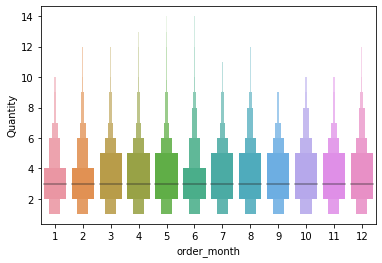

In [44]:
sns.boxenplot(x="order_month", y="Quantity", data=df)

In [45]:
# Problem 3
returns_df = pd.read_csv("./data/Returns.csv")


In [46]:
returns_df.describe()

,Returned,Order ID,Region
count,1079,1079,1079
unique,1,1079,24
top,Yes,MX-2012-ND1837082-41223,Western Europe
freq,1079,1,121


In [47]:
returns_df.dtypes

Returned    object
Order ID    object
Region      object
dtype: object

In [48]:
returns_df.sample(5)

,Returned,Order ID,Region
746,Yes,IT-2012-BD1172591-40992,Western Europe
123,Yes,ES-2012-ER13855120-41159,Southern Europe
1047,Yes,CA-2015-BD11725140-42276,Western US
188,Yes,CA-2015-DO13645140-42263,Western US
194,Yes,MX-2013-EC1405018-41599,South America


In [49]:
combined_df = df.merge(right=returns_df, how="left", left_on="Order.ID", right_on="Order ID")



In [50]:
combined_df["Returned"].value_counts()

Yes    2220
Name: Returned, dtype: int64

In [51]:
returns_df.shape

(1079, 3)

In [52]:
combined_df["Returned"] = combined_df["Returned"].fillna("No")


In [53]:
combined_df["Returned"].value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [54]:
# Problem 4_1
# Profit Lost by Order Year
returns_mask = combined_df["Returned"] == "Yes"
combined_df.loc[returns_mask, ].groupby(["order_year", "Returned"]).agg({"Profit": sum})


,,Profit
order_year,Returned,
2012,Yes,17477.26
2013,Yes,9269.89
2014,Yes,17510.63
2015,Yes,17112.97


In [55]:
# Problem 4_2
combined_df.loc[returns_mask, ].groupby(["Customer.Name"]).agg({"Order.ID": "count"})
# appears to be multiple customer IDs for the same customer name (not sure if that's for each order
# or it's truly a different customer -> assuming the former (


,Order.ID
Customer.Name,
Aaron Bergman,2
Aaron Hawkins,2
Aaron Smayling,2
Adam Shillingsburg,3
Adrian Barton,3
...,...
Vivian Mathis,5
William Brown,5
Yana Sorensen,1


In [56]:
grouped = combined_df.loc[returns_mask, ].groupby(["Customer.Name"])
grouped.filter(lambda x: x["Customer.Name"].count() > 5)["Customer.Name"].unique()

array(['Phillip Breyer', 'Nathan Mautz', "Russell D'Ascenzo",
       'Elizabeth Moffitt', 'John Castell', 'Brenda Bowman', 'Scot Coram',
       'Rob Dowd', 'Jocasta Rupert', 'Daniel Lacy', 'Shui Tom',
       'Magdelene Morse', 'Darrin Martin', 'Bill Shonely', 'Luke Weiss',
       'Kelly Andreada', 'Christine Sundaresam', 'Paul Knutson',
       'Bill Tyler', 'Cari Schnelling', 'Ann Blume', 'Anna Andreadi',
       'Juliana Krohn', 'Erin Smith', "Doug O'Connell",
       'Sean Christensen', 'Greg Tran', 'Stuart Calhoun',
       'Andrew Gjertsen', 'Lena Radford', 'Penelope Sewall',
       'Tom Boeckenhauer', 'Mathew Reese', 'Gary Mitchum', 'Ben Ferrer',
       'Brian Moss', 'Jeremy Pistek', 'Anna Gayman', 'Alyssa Tate',
       'Trudy Brown', 'Chuck Magee', 'Carl Weiss', 'Don Jones',
       'Michelle Arnett', 'Kristen Hastings', 'Annie Thurman',
       "Patrick O'Brill", 'Eugene Barchas', 'Julia Dunbar',
       'Astrea Jones', 'Darrin Van Huff', 'Emily Phan', 'Bart Pistole',
       'Dean Bra

In [57]:
combined_df.loc[returns_mask, ].groupby(["Region"])["Order.ID"].nunique()



KeyError: 'Region'

In [58]:
# Western Europe followed by Central America were the top
combined_df.groupby(["Region_y"])["Order.ID"].nunique().sort_values(ascending=False)

Region_y
Western Europe       121
Central America      117
Oceania               78
Western US            72
Eastern US            69
Southeastern Asia     64
South America         61
Southern Asia         58
Southern Europe       55
Eastern Asia          53
Western Asia          50
Southern US           44
Northern Europe       43
Central US            42
Caribbean             31
Western Africa        29
North Africa          26
Eastern Europe        24
Southern Africa       11
Eastern Africa        11
Central Africa        10
Eastern Canada         5
Central Asia           4
Western Canada         1
Name: Order.ID, dtype: int64

In [59]:
combined_df.loc[returns_mask, ].groupby(["Category"])["Order.ID"].nunique().sort_values(ascending=False)




Category
Office Supplies    806
Technology         365
Furniture          353
Name: Order.ID, dtype: int64

In [60]:
combined_df.loc[returns_mask, ].groupby(["Category", "Sub.Category"])["Order.ID"].nunique().sort_values(ascending=False)



Category         Sub.Category
Office Supplies  Binders         239
                 Art             187
                 Storage         186
Technology       Phones          133
Furniture        Chairs          132
Office Supplies  Paper           132
Technology       Accessories     129
Office Supplies  Labels          127
Furniture        Furnishings     124
                 Bookcases        99
Office Supplies  Fasteners        98
                 Supplies         96
Technology       Copiers          94
Office Supplies  Envelopes        91
Technology       Machines         59
Office Supplies  Appliances       59
Furniture        Tables           38
Name: Order.ID, dtype: int64

In [64]:
combined_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'order_month',
       'order_year', 'Returned', 'Order ID', 'Region_y'],
      dtype='object')

In [65]:
# Part II
# Problem 4
combined_df["return_target"] = combined_df["Returned"].map({"Yes": 1, "No": 0 })


In [66]:
combined_df["return_target"].describe()

count    51290.000000
mean         0.043283
std          0.203496
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: return_target, dtype: float64

In [68]:
# Problem 4 Step 2
combined_df["Process.Time"] = combined_df["Ship.Date"] - combined_df["Order.Date"]
combined_df["Process.Time"].describe()


count                     51290
mean     3 days 23:15:53.589393
std      1 days 17:30:23.320880
min             0 days 00:00:00
25%             3 days 00:00:00
50%             4 days 00:00:00
75%             5 days 00:00:00
max             7 days 00:00:00
Name: Process.Time, dtype: object

In [69]:
combined_df.dtypes

Row.ID                      int64
Order.ID                   object
Order.Date         datetime64[ns]
Ship.Date          datetime64[ns]
Ship.Mode                  object
Customer.ID                object
Customer.Name              object
Segment                    object
Postal.Code               float64
City                       object
State                      object
Country                    object
Region_x                   object
Market                     object
Product.ID                 object
Category                   object
Sub.Category               object
Product.Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Shipping.Cost             float64
Order.Priority             object
order_month                 int64
order_year                  int64
Returned                   object
Order ID                   object
Region_y                   object
return_target 

In [77]:
returned_prodcuts = combined_df.loc[returns_mask, ].groupby("Product.ID")["Order.ID"].nunique().sort_values(ascending=False).reset_index()


In [83]:
returned_prodcuts.columns = ["Product.ID", "Return_Count"]

In [84]:
returned_prodcuts

,Product.ID,Return_Count
0,OFF-FA-6129,12
1,OFF-ST-6033,9
2,OFF-ST-6251,6
3,OFF-ST-6031,6
4,OFF-AR-3499,6
...,...,...
1489,OFF-PA-6423,1
1490,OFF-PA-6429,1
1491,OFF-PA-6436,1
1492,OFF-PA-6437,1


In [86]:
combined_df = combined_df.merge(right=returned_prodcuts, on=["Product.ID"], how="left")

In [89]:
# combined_df["returned_prior"]
combined_df['Return_Count'] = combined_df["Return_Count"].fillna(0)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
target = combined_df["return_target"]

In [94]:
combined_df.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'order_month',
       'order_year', 'Returned', 'Order ID', 'Region_y', 'return_target',
       'Process.Time', 'Return_Count'],
      dtype='object')

In [100]:
features_df = combined_df[["Process.Time", "order_month", "Return_Count"]]

In [106]:
features_df["Process.Time"] = features_df["Process.Time"].dt.days

In [107]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.20, random_state = 42)

In [108]:
logit_reg = LogisticRegression()

In [109]:
logit_reg.fit(X=X_train, y=y_train)
print(f"Train R2 is {logit_reg.score(X=X_train, y=y_train)}")
print(f"Test R2 is {logit_reg.score(X=X_test, y=y_test)}")

Train R2 is 0.9560830571261455
Test R2 is 0.9592513160460129


In [110]:
from yellowbrick.classifier import ConfusionMatrix

<bound method ConfusionMatrix.show of ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001C365154E08>,
                classes=['not returned', 'returned'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001C36519FD08>,
                encoder=None, fontsize=None, force_model=False, is_fitted=True,
                model=None, percent=False, sample_weight=None)>

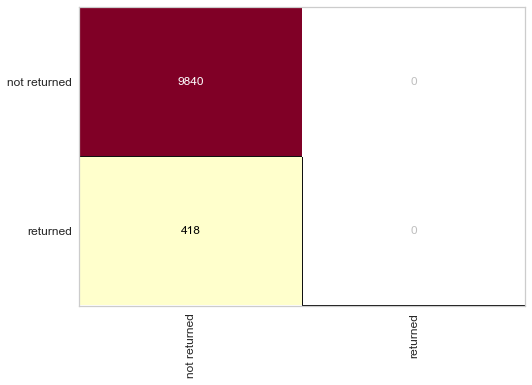

In [112]:
cm = ConfusionMatrix(model=logit_reg, classes=["not returned", "returned"], is_fitted=True)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show